In [1]:
#to start, import pandas an numpy
import pandas as pd
import numpy as np

In [2]:
#import data using pandas
data = pd.read_csv('Data/telecom-data.csv')

#take an initial look at our data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Clean Data

In [3]:
#lets start by dropping phone number and the state
df = data.drop(columns=['phone number', 'state'], axis=1)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [6]:
#convert yes, no to 1, 0 respectfully so that they can be used in our models.

yeahno = {'no':0, 'yes':1}
df['international plan'] = df['international plan'].map(yeahno)
df['voice mail plan'] = df['voice mail plan'].map(yeahno)

#convert churn from bools to 0s and 1s
df['churn'] = df['churn'].astype(int)
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


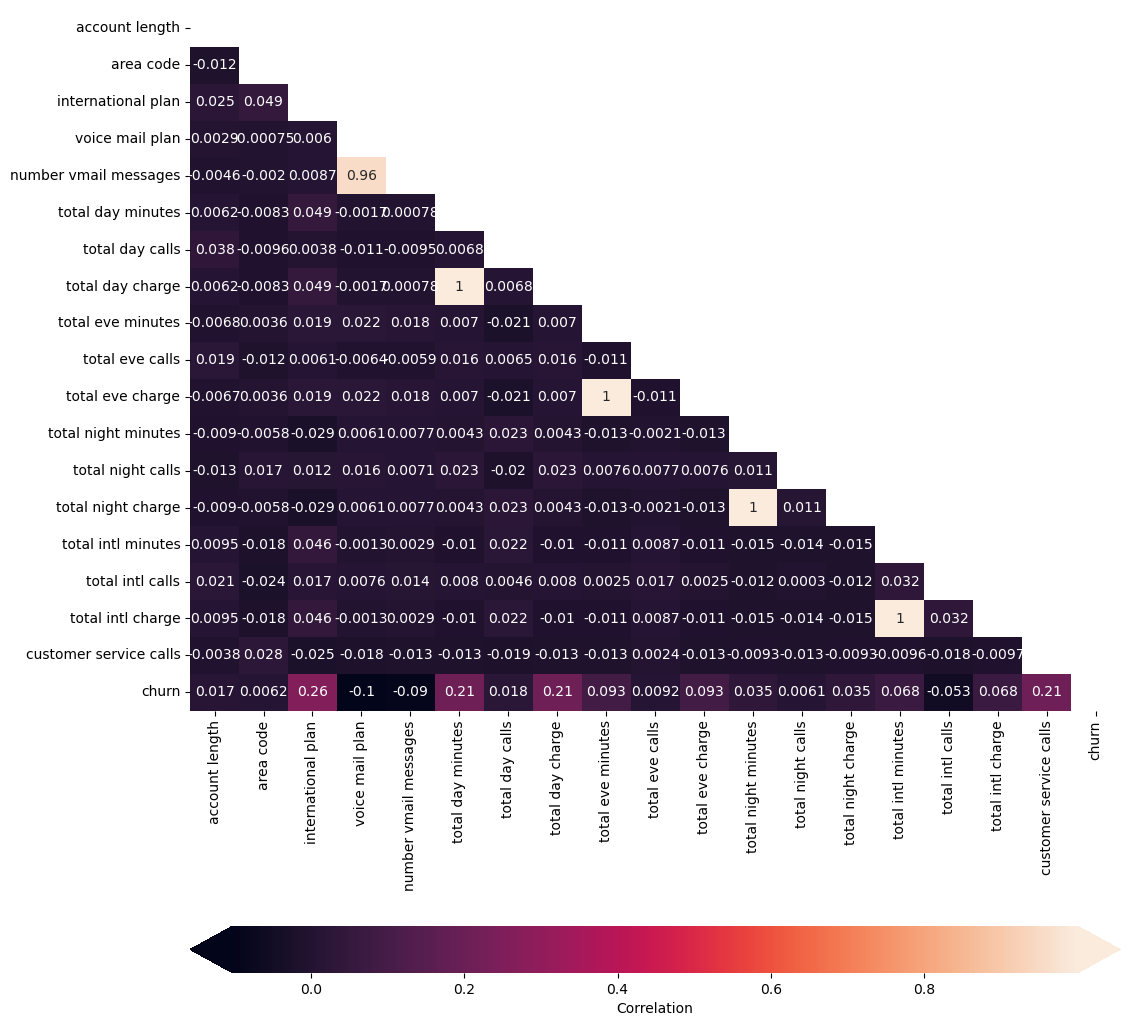

In [7]:
#import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create a heatmap to see the correlation between our variables.
heatmap_data = df
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

In [8]:
#lookign deeper into our models we can find that there are fixed charges per minute and the costs are fully correlated
df_temp = pd.DataFrame(df.churn)
df_temp['day cost per minute'] = round(df['total day charge'] / df['total day minutes'], 3)
df_temp['eve cost per minute'] = round(df['total eve charge'] / df['total eve minutes'], 3)
df_temp['night cost per minute'] = round(df['total night charge'] / df['total night minutes'], 3)
df_temp['intl cost per minute'] = round(df['total intl charge'] / df['total intl minutes'], 3)

df_temp

,churn,day cost per minute,eve cost per minute,night cost per minute,intl cost per minute
0,0,0.17,0.085,0.045,0.27
1,0,0.17,0.085,0.045,0.27
2,0,0.17,0.085,0.045,0.27
3,0,0.17,0.085,0.045,0.27
4,0,0.17,0.085,0.045,0.27
...,...,...,...,...,...
3328,0,0.17,0.085,0.045,0.27
3329,0,0.17,0.085,0.045,0.27
3330,0,0.17,0.085,0.045,0.27
3331,0,0.17,0.085,0.045,0.27


In [9]:
#take a look at the distribution of our cost per minute
df_temp.describe()

,churn,day cost per minute,eve cost per minute,night cost per minute,intl cost per minute
count,3333.000000,3331.000000,3.332000e+03,3.333000e+03,3315.000000
mean,0.144914,0.170000,8.500000e-02,4.500000e-02,0.270052
std,0.352067,0.000025,3.747565e-16,5.690747e-16,0.000324
min,0.000000,0.169000,8.500000e-02,4.500000e-02,0.268000
25%,0.000000,0.170000,8.500000e-02,4.500000e-02,0.270000
50%,0.000000,0.170000,8.500000e-02,4.500000e-02,0.270000
75%,0.000000,0.170000,8.500000e-02,4.500000e-02,0.270000
max,1.000000,0.171000,8.500000e-02,4.500000e-02,0.273000


From our cost per minute calculations we can see that the call and cost per minute are dependant on one another. Because of this we should drop one or the other columns. For this project we will be dropping all of the total charges, as we will build a total bill to see the total cost customers were paying and if potentially a higher bill would lead to a higher churn rate and will keep the total minutes as their own columns.

In [10]:
#make a new column for the total cost of all charges. 
df['total cost'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total cost
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,60.10
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,63.53
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,67.74
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,57.53


In [11]:
#remove individual charges and voicemail plan
df =df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'voice mail plan'], axis=1)
df

,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10
3329,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53
3330,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74
3331,184,510,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53


In [12]:
#check area code
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

It looks like there are only three area codes. Because of this, it would probably be best to convert them into categorical, dummy variables. 

In [13]:
#convert area code to categorical dummies
df1 = pd.get_dummies(df['area code'], prefix='area code', drop_first=True)
df1

,area code_415,area code_510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
3328,1,0
3329,1,0
3330,0,1
3331,0,1


In [14]:
#combine the dummies and the base dataframe
df = pd.concat([df, df1], axis=1)
df

,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost,area code_415,area code_510
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56,1,0
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29,1,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80,0,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10,1,0
3329,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53,1,0
3330,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74,0,1
3331,184,510,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53,0,1


In [15]:
#drop area code from the dataframe as it has been split into categorical columns above.
df = df.drop('area code', axis=1)
df

,account length,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost,area code_415,area code_510
0,128,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56,1,0
1,107,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29,1,0
3,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80,0,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10,1,0
3329,68,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53,1,0
3330,28,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74,0,1
3331,184,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53,0,1


In [16]:
#check to make sure that we are not missing any values and all our dtpyes are in usable format (should be int or float).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int32  
 13  total cost              3333 non-null   float64
 14  area code_415           3333 non-null   

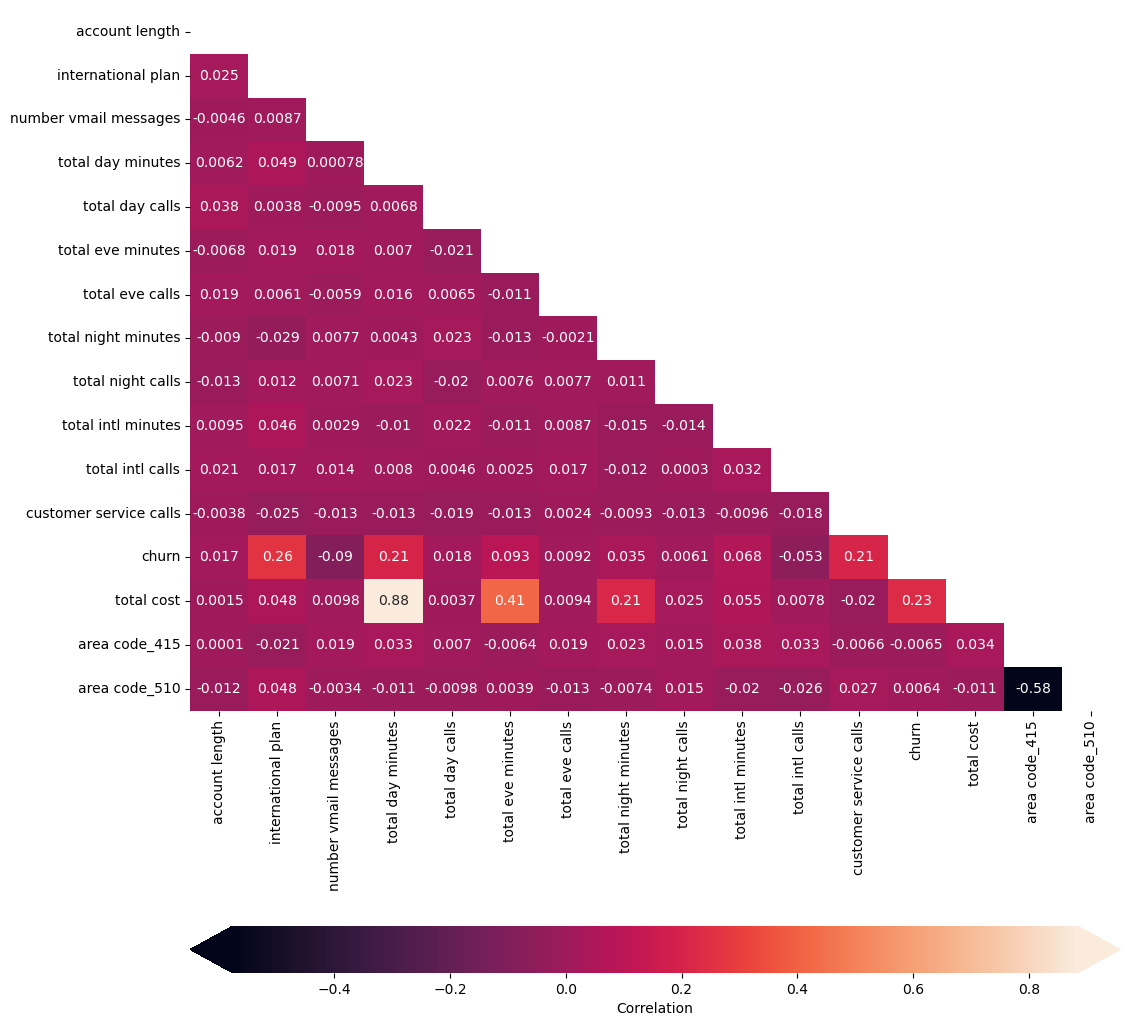

In [17]:
heatmap_data = df
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

So the column we made for total cost has a very high correlation with total total day minutes. There is also a very high correlation 

The data should now be ready for modeling. The categorical variables have been converted using dummies, all variables that should be closely correlated should have been delt with.  

# Building our First Model

In [18]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [19]:
#Check the frequency of the churn, our dependant variable
df.churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

Above we can see that the retention rate (those that did not churn) is 85.5%. Because of this we can expect that through just by selecting nobody churning, we would get an accuracy of 85.5%

In [20]:
#import train test split module
from sklearn.model_selection import train_test_split

#seperate the independant variables from our dependant variables
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.25)

In [21]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2136
1     363
Name: churn, dtype: int64
0    714
1    120
Name: churn, dtype: int64


In [22]:
X_train.head()

,account length,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total cost,area code_415,area code_510
2329,137,0,0,104.7,115,249.8,144,192.3,99,8.9,2,1,50.08,1,0
1347,111,0,0,224.9,117,191.9,127,229.9,97,10.3,3,0,67.67,0,0
2994,128,0,0,227.9,130,302.6,71,191.5,82,5.5,7,1,74.57,0,0
1412,131,0,24,135.9,60,233.2,78,210.6,121,9.4,4,1,54.94,1,0
96,73,0,0,160.1,110,213.3,72,174.1,72,13.0,4,0,56.69,1,0


We can see that our data is on varying scales and should be standardized before we run our model, to prevent some variables to be weighted more than others.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
logreg = LogisticRegression(fit_intercept=False, C=1e15, solver='liblinear')
logreg.fit(X_train, y_train)

y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [25]:
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals).value_counts())
print(pd.Series(train_residuals).value_counts(normalize=True))

0    2144
1     355
Name: churn, dtype: int64
0    0.857943
1    0.142057
Name: churn, dtype: float64


In [26]:
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals).value_counts())
print(pd.Series(test_residuals).value_counts(normalize=True))

0    712
1    122
Name: churn, dtype: int64
0    0.853717
1    0.146283
Name: churn, dtype: float64


In [27]:
from sklearn.metrics import accuracy_score, roc_curve, auc

acc = accuracy_score(y_test, y_hat_test)
print('Accuracy of First Tree: {0}'.format(acc))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Area under the curve is: {0}'.format(roc_auc, 3))

Accuracy of First Tree: 0.8537170263788969
Area under the curve is: 0.5540616246498599


In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [29]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [30]:
'''

'''
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_hat_test)

Precision Score: 0.47058823529411764
Recall Score: 0.13333333333333333
Accuracy Score: 0.8537170263788969
F1 Score: 0.2077922077922078


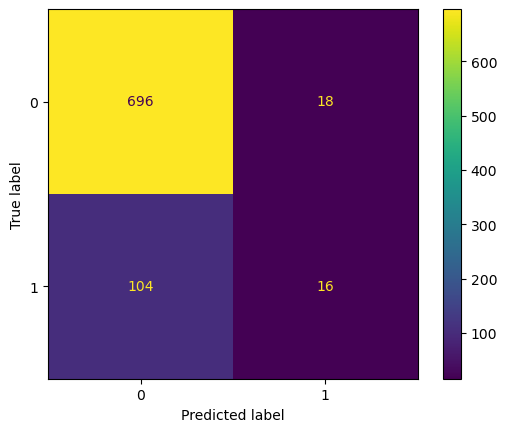

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
matrix.plot();

From our first model it looks like we are getting many (104) false negatives (type 2 errors). We also got a few false positive errors at 18 (type 1 errors). This is not a bad start, however we are missing many of our predicted values, and thus we should be able to imporve on our model. 

To proceed we can start by trying to change the scope of our model, so that the model can predict more of our positive values. 

# Build a First Tree

Decision trees can be a very helpful in building a model. Lets start by making an initial tree to see if it imporves on our base model.

In [32]:
#import Decision Tree Classifier, and initiate it.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

classifier = DecisionTreeClassifier(random_state=11)
classifier.fit(X_train_scaled, y_train)

#make prediction with our decision tree
y_pred = classifier.predict(X_test_scaled)

In [33]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy of First Tree: {0}'.format(acc))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Area under the curve is: {0}'.format(roc_auc, 3))

Accuracy of First Tree: 0.9448441247002398
Area under the curve is: 0.9053921568627452


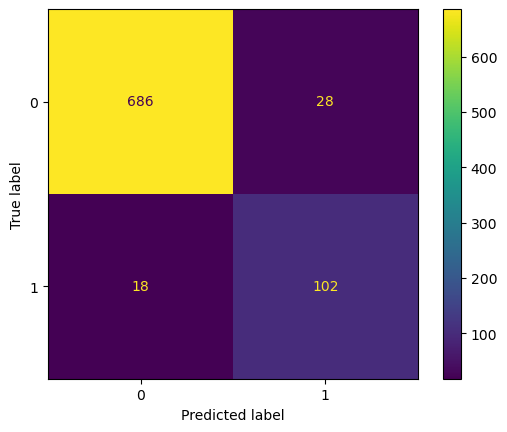

In [34]:
cnf_matrix2 = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2)
matrix.plot();

In [35]:
print_metrics(y_test, y_pred)

Precision Score: 0.7846153846153846
Recall Score: 0.85
Accuracy Score: 0.9448441247002398
F1 Score: 0.816


In [36]:
cv_score = cross_val_score(classifier, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score}")

Mean Cross Validation Score: 0.9523809523809524


We have already seen a huge improvment in our model with a base decision tree, we saw a huge decrease in false negatives and a large increase in true positives.
There was a slight increase in false positives as well as a slight decrease in in true negatives. However, overall with the baseline decision tree, we have built a far more accurate and better performing model. 

We can build on this by optamizing trees with diffrent metrics and building a random forest to build on our model even further.


## Regression Tree

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regressor = DecisionTreeRegressor(random_state=11)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.05275779376498801
0.05275779376498801
0.22969064797023844


In [38]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Regression Tree: {0}'.format(acc))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Area under the curve is: {0}'.format(roc_auc, 3))

Accuracy of Regression Tree: 0.947242206235012
Area under the curve is: 0.9067927170868348


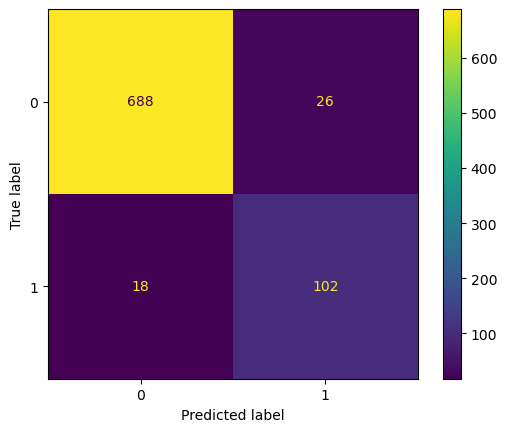

In [39]:
cnf_matrix2 = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2)
matrix.plot();

In [40]:
print_metrics(y_test, y_pred)

Precision Score: 0.796875
Recall Score: 0.85
Accuracy Score: 0.947242206235012
F1 Score: 0.8225806451612903


## Optimize the Tree

In [41]:
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    # Return the score

    return [r2, rmse]


score = performance(y_test, y_pred)
score

[0.5717086834733893, 0.22969064797023844]

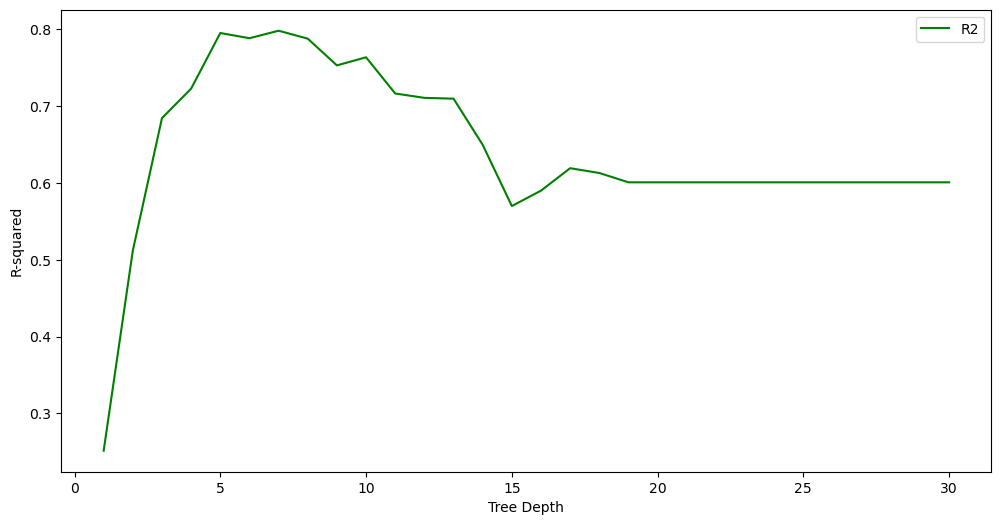

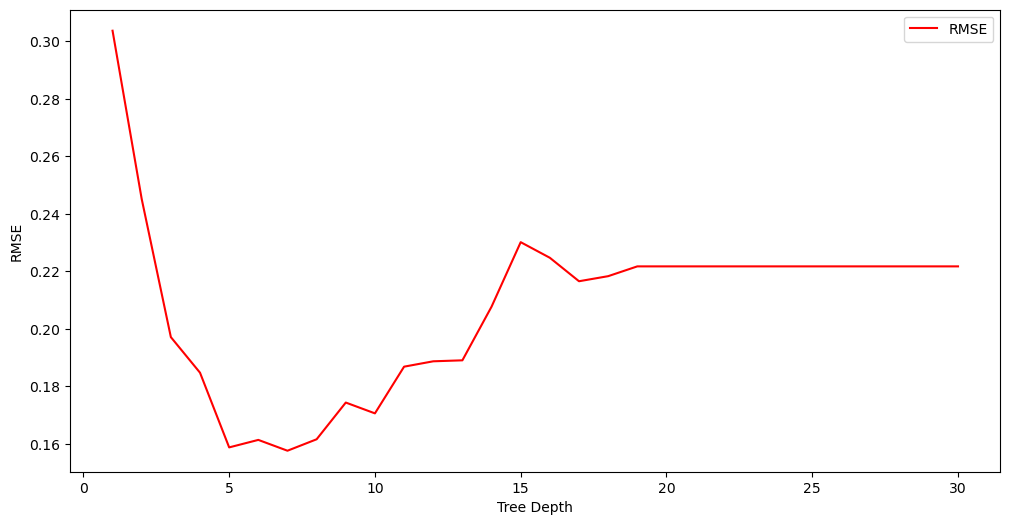

In [42]:
max_depths = list(range(1,31))
rmse_results = []
r2d2 = []

for depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    
    r2d2.append(score[0])
    rmse_results.append(score[1])
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, r2d2, 'green', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(max_depths, rmse_results, 'red', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

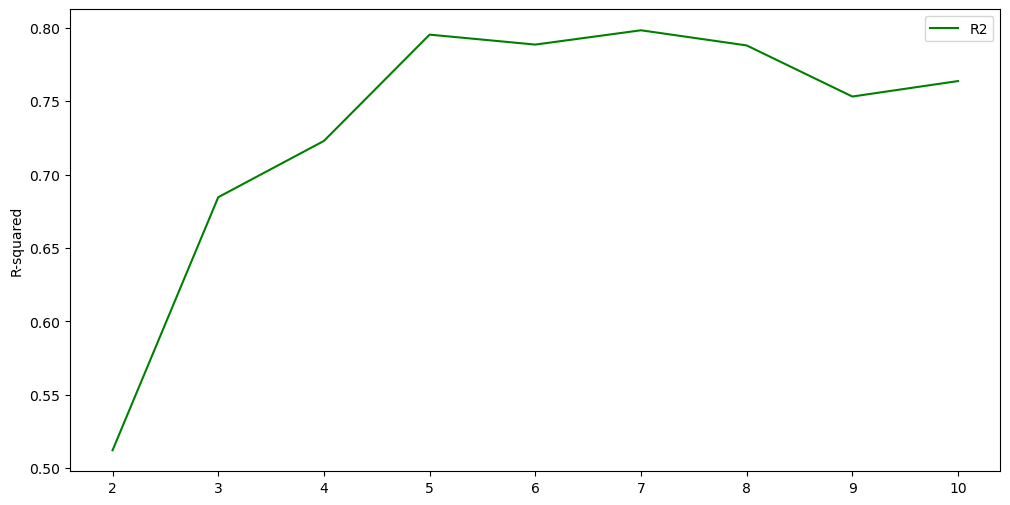

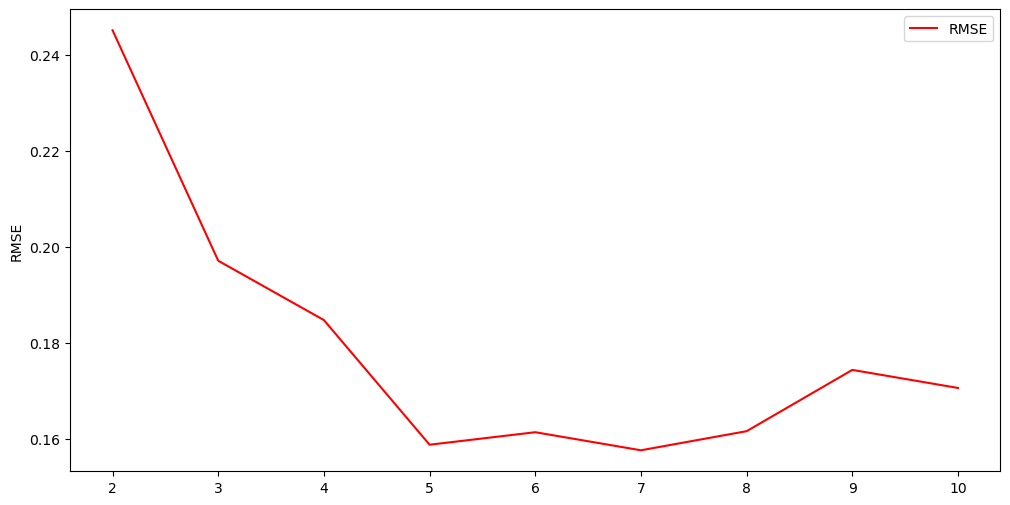

In [43]:
min_samples_split = list(range(2,11))
rmse_results = []
r2d2 = []

for sample in min_samples_split:
    regressor = DecisionTreeRegressor(max_depth=sample, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    
    r2d2.append(score[0])
    rmse_results.append(score[1])
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_split, r2d2, 'green', label='R2')
plt.ylabel('R-squared')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(min_samples_split, rmse_results, 'red', label='RMSE')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [44]:
'''
Might drop the following 3 cells
'''

'\nMight drop the following 3 cells\n'

In [45]:
def optimizer(samples, depth, random):
    regressor = DecisionTreeRegressor(min_samples_split=samples, max_depth=depth, random_state=random)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    
    return (score[0], score[1], regressor)

In [46]:
optimizer(7, 7, 11)

(0.8026353304574605,
 0.15592235448414277,
 DecisionTreeRegressor(max_depth=7, min_samples_split=7, random_state=11))

In [47]:
optimizer(5, 5, 11)

(0.8029079295316128,
 0.15581463769675644,
 DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=11))

# Hi ya Neighbor!

In [48]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
preds = clf.predict(X_test_scaled)

C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
print_metrics(y_test, preds)

Precision Score: 0.8695652173913043
Recall Score: 0.3333333333333333
Accuracy Score: 0.8968824940047961
F1 Score: 0.48192771084337344


So a base nearest neighbor model out performed our base model, but was not at succesful as our decision trees. 

In [50]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    # Your code here
    best_k = 0
    best_score = 0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
            
    print('best value for k: {}'.format(best_k))
    print('F1-Score: {}'.format(best_score))

In [51]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

best value for k: 3
F1-Score: 0.5


C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

A slight improvement, but not much.

In [52]:
model = KNeighborsClassifier(n_neighbors=3, leaf_size=20)
model.fit(X_train_scaled, y_train)
preds2 = model.predict(X_test_scaled)
print_metrics(y_test, preds2)

Precision Score: 0.71875
Recall Score: 0.38333333333333336
Accuracy Score: 0.8896882494004796
F1 Score: 0.5


C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Pipes

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [54]:
#using same as above to set up Neighbors
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
preds3 = clf.predict(X_test_scaled)
print_metrics(y_test, preds3)
clf.score(X_test_scaled, y_test)

Precision Score: 0.8695652173913043
Recall Score: 0.3333333333333333
Accuracy Score: 0.8968824940047961
F1 Score: 0.48192771084337344


C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8968824940047961

In [55]:
#setup inital pipeline with standard scaler and KNeighbor classifier
scaled_pipes1 = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier())])

In [56]:
scaled_pipes1.fit(X_train, y_train)
preds4 = scaled_pipes1.predict(X_test)
scaled_pipes1.score(X_test, y_test)
print_metrics(y_test, preds4)
scaled_pipes1.score(X_test, y_test)

C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Precision Score: 0.8695652173913043
Recall Score: 0.3333333333333333
Accuracy Score: 0.8968824940047961
F1 Score: 0.48192771084337344


C:\Users\grant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8968824940047961

In [57]:
scaled_pipes2 = Pipeline([('ss', StandardScaler()), ('RF', RandomForestClassifier(random_state=11))])

In [58]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [59]:
gridsearch = GridSearchCV(estimator=scaled_pipes2, param_grid=grid, scoring='accuracy', cv=5)

In [60]:
gridsearch.fit(X_train, y_train)

preds5 = gridsearch.predict(X_test)
print_metrics(y_test, preds3)

gridsearch.score(X_test, y_test)

Precision Score: 0.8695652173913043
Recall Score: 0.3333333333333333
Accuracy Score: 0.8968824940047961
F1 Score: 0.48192771084337344


0.9460431654676259

In [61]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [16,18,20], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [62]:
gridsearch = GridSearchCV(estimator=scaled_pipes2, param_grid=grid, scoring='accuracy', cv=5)

In [63]:
gridsearch.fit(X_train, y_train)

preds5 = gridsearch.predict(X_test)
print_metrics(y_test, preds3)

gridsearch.score(X_test, y_test)

Precision Score: 0.8695652173913043
Recall Score: 0.3333333333333333
Accuracy Score: 0.8968824940047961
F1 Score: 0.48192771084337344


0.9496402877697842

# Ensembles

In [64]:
from sklearn.ensemble import BaggingClassifier

In [65]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [66]:
tree_clf.feature_importances_

array([0.0072947 , 0.08710323, 0.11249692, 0.00119316, 0.00799479,
       0.01526127, 0.        , 0.00889274, 0.00251627, 0.09691322,
       0.07993818, 0.10540161, 0.47253303, 0.        , 0.00246088])

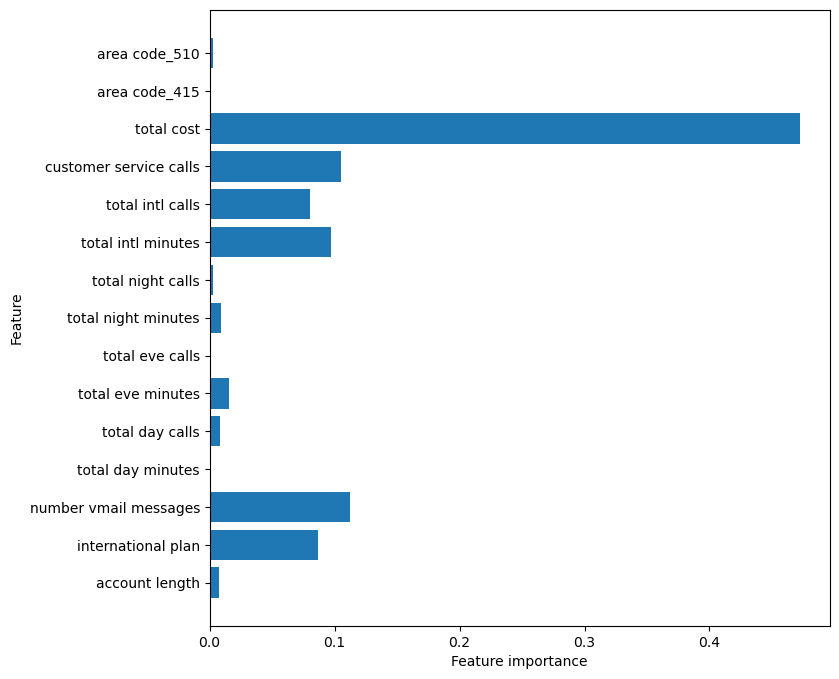

In [67]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)


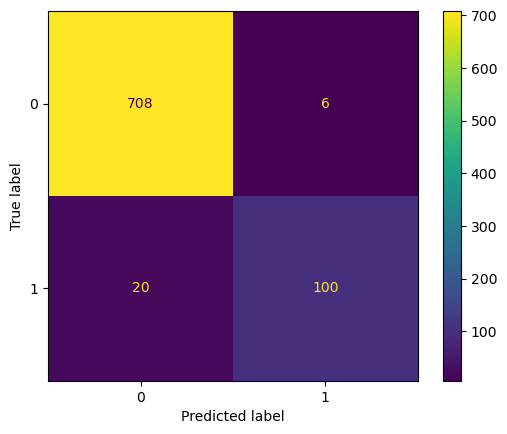

In [68]:
pred_tree = tree_clf.predict(X_test)

cnf_matrix3 = confusion_matrix(y_test, pred_tree)

matrix3 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix3)
matrix3.plot();

In [69]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_tree) * 100))

Testing Accuracy for Decision Tree Classifier: 96.88%


# Bagging Trees

In [70]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=11, min_samples_leaf=7), n_estimators=14)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_leaf=7,
                                                        random_state=11),
                  n_estimators=14)

In [71]:
bagged_tree.score(X_test, y_test)

0.9796163069544365

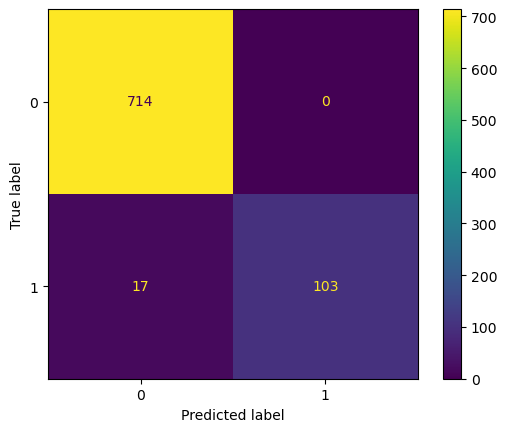

In [72]:
pred_bag = bagged_tree.predict(X_test)

bag_matrix = confusion_matrix(y_test, pred_bag)

matrix4 = ConfusionMatrixDisplay(confusion_matrix=bag_matrix)
matrix4.plot();

# Random Forest

In [73]:
forest = RandomForestClassifier(n_estimators=20, max_depth=5, max_features=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=20)

In [74]:
forest.score(X_test, y_test)

0.9772182254196643

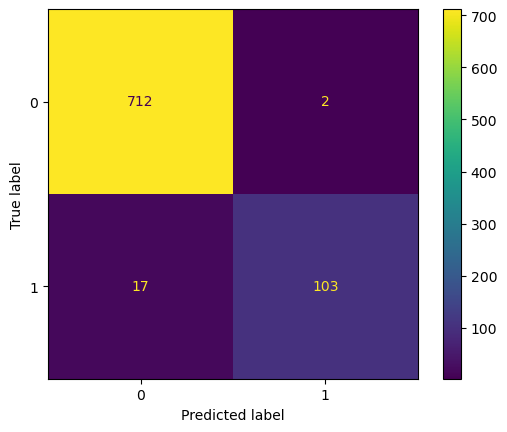

In [75]:
pred_forest = forest.predict(X_test)

forest_matrix = confusion_matrix(y_test, pred_forest)

matrix5 = ConfusionMatrixDisplay(confusion_matrix=forest_matrix)
matrix5.plot();

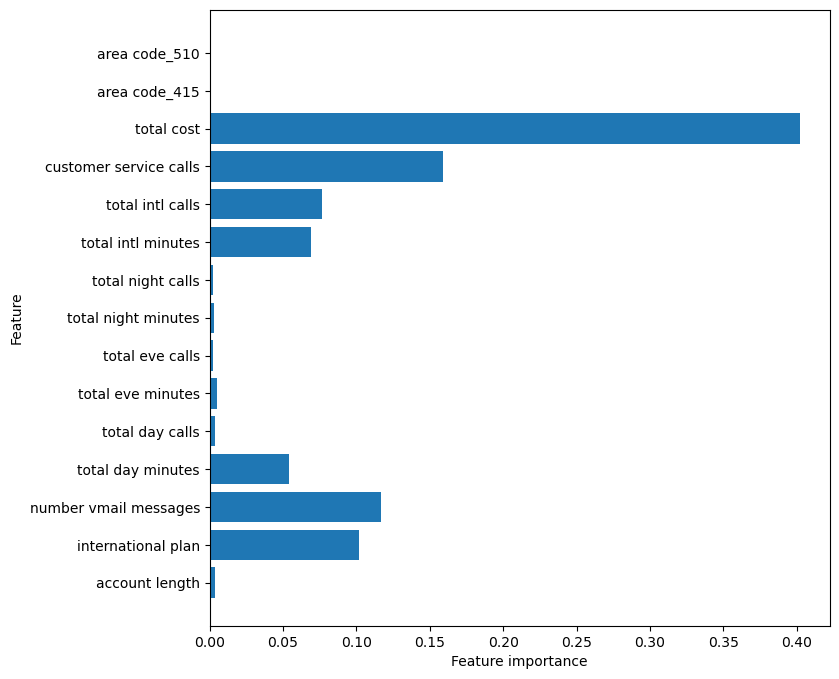

In [76]:
plot_feature_importances(forest)

# Bagging Forests

In [77]:
bagged_tree = BaggingClassifier(RandomForestClassifier(criterion='gini', max_depth=12, random_state=11, min_samples_leaf=2, max_features=10), n_estimators=10)
bagged_tree.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=12,
                                                        max_features=10,
                                                        min_samples_leaf=2,
                                                        random_state=11))

In [78]:
bagged_tree.score(X_test_scaled, y_test)

0.9748201438848921

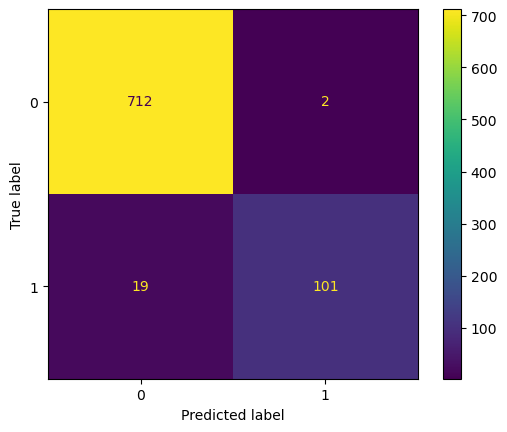

In [79]:
pred_bag = bagged_tree.predict(X_test_scaled)

bag_matrix = confusion_matrix(y_test, pred_bag)

matrix4 = ConfusionMatrixDisplay(confusion_matrix=bag_matrix)
matrix4.plot();

In [80]:
score = cross_val_score(bagged_tree, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score}")

Mean Cross Validation Score: 0.9763905562224889


# Grid Search - Random Forest

In [81]:
param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6] 
}

In [82]:
rforestC = RandomForestClassifier(random_state=11)

forest_gs = GridSearchCV(rforestC, param_grid, cv=3)
forest_gs.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {forest_gs.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs.best_params_}")

Training Accuracy: 97.24%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}


In [83]:
param_grid2 = {
    'n_estimators': [20, 30, 50, 75],
    'criterion': ['entropy'],
    'max_depth': [None, 20],
    'min_samples_split': [8, 10, 12, 20],
    'min_samples_leaf': [2, 3, 4] 
}

In [84]:
forest_gs2 = GridSearchCV(rforestC, param_grid2, cv=3)
forest_gs2.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {forest_gs2.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs2.best_params_}")

Training Accuracy: 97.56%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


In [85]:
param_grid3 = {
    'n_estimators': [25, 30, 33, 35, 38, 40],
    'criterion': ['entropy'],
    'max_depth': [None, 20, 30],
    'min_samples_split': [9],
    'min_samples_leaf': [2] 
}

In [86]:
forest_gs3 = GridSearchCV(rforestC, param_grid3, cv=3)
forest_gs3.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {forest_gs3.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs3.best_params_}")

Training Accuracy: 97.60%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 33}


In [87]:
forest_gs3.score(X_train_scaled, y_train)

0.9795918367346939

In [88]:
forest_gs3.score(X_test_scaled, y_test)

0.9760191846522782

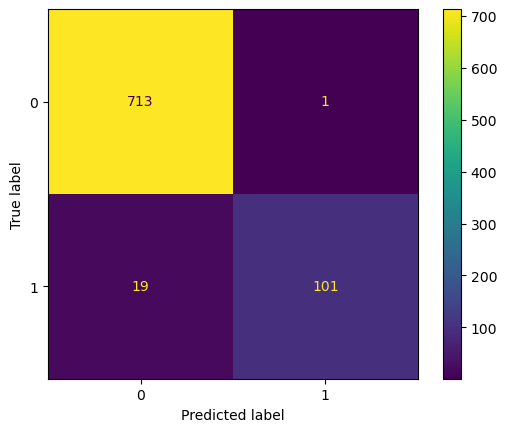

In [89]:
pred_gs = forest_gs3.predict(X_test_scaled)

gs_matrix = confusion_matrix(y_test, pred_gs)

matrix5 = ConfusionMatrixDisplay(confusion_matrix=gs_matrix)
matrix5.plot();

# Gradient BOOST

In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

adaboo = AdaBoostClassifier(random_state=11)
gradboo = GradientBoostingClassifier(random_state=11)

adaboo.fit(X_train_scaled, y_train)
gradboo.fit(X_train_scaled, y_train)

pred_train_ada = adaboo.predict(X_train_scaled)
pred_test_ada = adaboo.predict(X_test_scaled)

pred_train_grad = gradboo.predict(X_train_scaled)
pred_test_grad = gradboo.predict(X_test_scaled)

In [91]:
print_metrics(y_train, pred_train_ada)
cross_val_score(adaboo, X, y, cv=5).mean()

Precision Score: 0.8292682926829268
Recall Score: 0.5619834710743802
Accuracy Score: 0.9195678271308524
F1 Score: 0.6699507389162562


0.9153963558761161

In [92]:
print_metrics(y_test, pred_test_ada)
cross_val_score(adaboo, X, y, cv=5).mean()

Precision Score: 0.7848101265822784
Recall Score: 0.5166666666666667
Accuracy Score: 0.9100719424460432
F1 Score: 0.6231155778894473


0.9153963558761161

In [93]:
print_metrics(y_train, pred_train_grad)
cross_val_score(gradboo, X, y, cv=5).mean()

Precision Score: 1.0
Recall Score: 0.8732782369146006
Accuracy Score: 0.9815926370548219
F1 Score: 0.9323529411764706


0.9780992386689539

In [94]:
print_metrics(y_test, pred_test_grad)
cross_val_score(gradboo, X, y, cv=5).mean()

Precision Score: 0.9811320754716981
Recall Score: 0.8666666666666667
Accuracy Score: 0.9784172661870504
F1 Score: 0.9203539823008849


0.9780992386689539

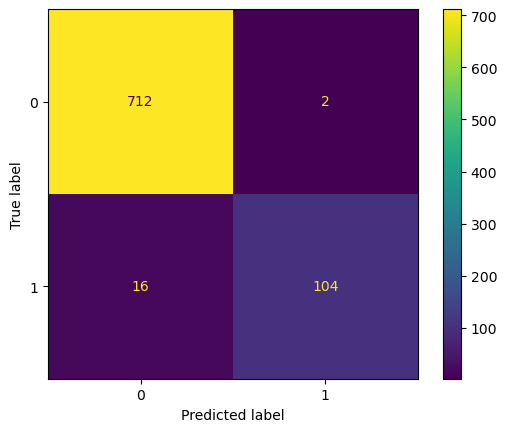

In [95]:
gb_matrix = confusion_matrix(y_test, pred_test_grad)

matrix6 = ConfusionMatrixDisplay(confusion_matrix=gb_matrix)
matrix6.plot();

# XGBoost

In [96]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [97]:
#all variables must start at 0, not a diffrent value.
#drop this shit!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
encoder = LabelEncoder()

y_train_xgb = pd.Series(encoder.fit_transform(y_train))
y_test_xgb = pd.Series(encoder.transform(y_test))

In [116]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb_train = xgb.predict(X_train)
pred_xgb_test = xgb.predict(X_test)


In [99]:
print_metrics(y_train, pred_xgb_train)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [100]:
print_metrics(y_test, pred_xgb_test)

Precision Score: 0.9903846153846154
Recall Score: 0.8583333333333333
Accuracy Score: 0.9784172661870504
F1 Score: 0.9196428571428571


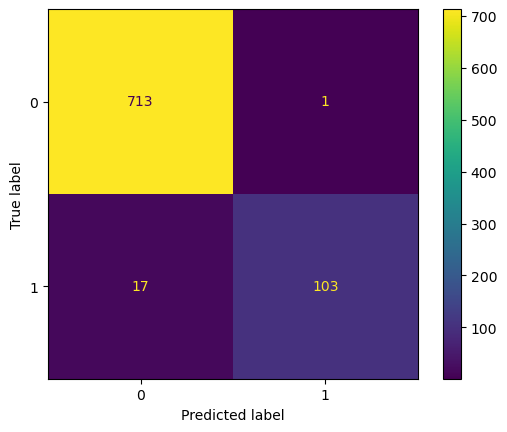

In [114]:
xgb_matrix = confusion_matrix(y_test, pred_xgb_test)

matrix7 = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix)
matrix7.plot();

In [117]:
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 4, 6, 8],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.3, 0.5, 0.7],
    'n_estimators': [10, 50, 100],
}


In [118]:
gridxgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=None, n_jobs=1)
gridxgb.fit(X_train, y_train)

best_parameters = gridxgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5

Training Accuracy: 97.92%
Validation accuracy: 98.08%


In [119]:
print_metrics(y_test, test_preds)

Precision Score: 1.0
Recall Score: 0.8666666666666667
Accuracy Score: 0.9808153477218226
F1 Score: 0.9285714285714286


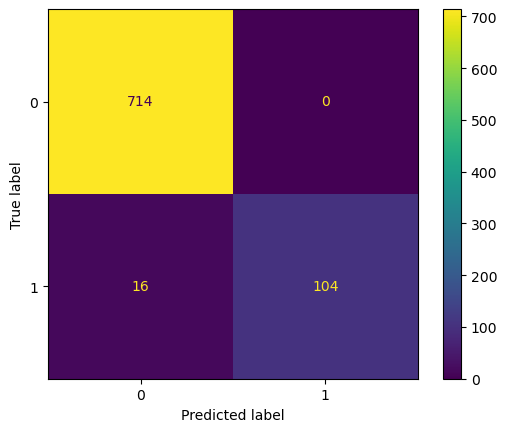

In [120]:
xgb_matrix = confusion_matrix(y_test, test_preds)

matrix8 = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix)
matrix8.plot();

In [121]:
param_grid_xgb = {
    'learning_rate': [0.2, 0.25, 0.3],
    'max_depth': [2, 5, 10, 20],
    'min_child_weight': [0.5, 1],
    'subsample': [0.4, 0.5, 0.6, 0.75],
    'n_estimators': [25, 50, 75],
}


In [131]:
gridxgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=None, n_jobs=1)
gridxgb.fit(X_train, y_train)

best_parameters = gridxgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.6}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.6}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5

Training Accuracy: 97.9192%
Validation accuracy: 98.0815%


In [123]:
print('')
print('Training Accuracy: {:.6}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.6}%'.format(test_accuracy * 100))


Training Accuracy: 97.9192%
Validation accuracy: 98.0815%


In [124]:
print_metrics(y_test, pred_xgb_test)

Precision Score: 0.9903846153846154
Recall Score: 0.8583333333333333
Accuracy Score: 0.9784172661870504
F1 Score: 0.9196428571428571


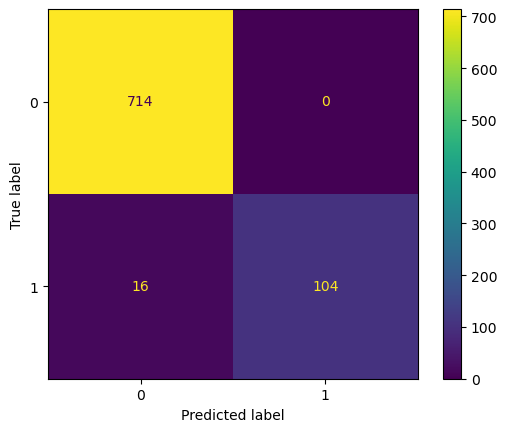

In [125]:
xgb_matrix = confusion_matrix(y_test, test_preds)

matrix9 = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix)
matrix9.plot();

In [126]:
param_grid_xgb = {
    'learning_rate': [0.2],
    'max_depth': [2],
    'min_child_weight': [1],
    'subsample': [0.5],
    'n_estimators': [40, 50, 60],
}


In [127]:
gridxgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=None, n_jobs=1)
gridxgb.fit(X_train, y_train)

best_parameters = gridxgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.6}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.6}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5

Training Accuracy: 97.9192%
Validation accuracy: 98.0815%


In [128]:
print_metrics(y_test, pred_xgb_test)

Precision Score: 0.9903846153846154
Recall Score: 0.8583333333333333
Accuracy Score: 0.9784172661870504
F1 Score: 0.9196428571428571


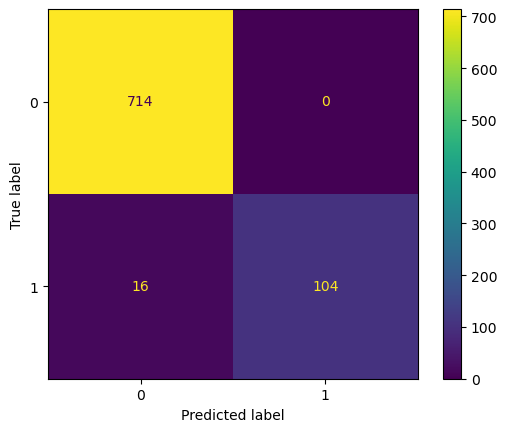

In [129]:
xgb_matrix = confusion_matrix(y_test, test_preds)

matrix10 = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix)
matrix10.plot();